# Introduction

This was a Python exploratory data analysis that I completed as part of my Master's Exploratory Data Analysis Project.

The project explores the cleaning and analysis of salaries of people who work in data industry across various countries. The data source for this project is kaggle and the dataset contains 5 tables, 1 Fact table and 4 dim tables.

The project aims to look into salries of various job roles and categories across data industry and find some interesting intresting relationships between company size, remote work, job category, employment type and various other attributes.

### Skills Used
In this exploratory data analysis I'll be applying my knowledge and skills in:

* Python
  * Numpy
  * Pandas
  * Matplotlib
  * Seaborn

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Reading the data from google drive into dataframes

salary_raw = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EDA/EDA_Salary/ds_salaries_raw.csv")
countries = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EDA/EDA_Salary/ds_countries.csv")
experience_levels = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EDA/EDA_Salary/ds_experience_levels.csv")
employment_types = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EDA/EDA_Salary/ds_employment_types.csv")
usd_exchange_rates = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EDA/EDA_Salary/ds_usd_exchange_rates.csv")

# Data Cleaning

### Cleaning Salary table

In [5]:
display(salary_raw)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,remote_work_type,company_location,company_size,job_category
0,2020,MI,FT,Data Scientist,70000.0,EUR,DE,0,On-site only,DE,L,Data Science
1,2020,SE,FT,Machine Learning Scientist,260000.0,USD,JP,0,On-site only,JP,S,Machine Learning
2,2020,SE,FT,Big Data Engineer,85000.0,GBP,GB,50,Hybrid,UK,M,Data Engineering
3,2020,MI,FT,Product Data Analyst,20000.0,USD,HN,0,On-site only,HN,S,Data Analyst
4,2020,SE,FT,Machine Learning Engineer,150000.0,USD,US,50,Hybrid,US,L,Machine Learning
...,...,...,...,...,...,...,...,...,...,...,...,...
623,2022,MI,FT,Data Engineer,45000.0,GBP,GB,100,Fully remote,UK,M,Data Engineering
624,2022,SE,FT,Data Scientist,260000.0,USD,US,100,Fully remote,US,M,Data Science
625,2022,SE,FT,Data Science Engineer,60000.0,USD,AR,100,Fully remote,MX,L,Data Engineering
626,2022,MI,FT,Data Engineer,63900.0,USD,US,0,On-site only,US,M,Data Engineering


In [6]:
salary_raw.shape

(628, 12)

The fact table **Salary** contains the 628 records and 12 columns

In [7]:
salary_raw.dtypes

work_year               int64
experience_level       object
employment_type        object
job_title              object
salary                float64
salary_currency        object
employee_residence     object
remote_ratio            int64
remote_work_type       object
company_location       object
company_size           object
job_category           object
dtype: object

In [8]:
salary_raw.count()

work_year             628
experience_level      628
employment_type       628
job_title             615
salary                614
salary_currency       626
employee_residence    628
remote_ratio          628
remote_work_type      587
company_location      628
company_size          620
job_category          615
dtype: int64

Checking missing value records in salary dataset...

In [9]:
salary_raw.apply(lambda x:sum(x.isnull()), axis=0)

work_year              0
experience_level       0
employment_type        0
job_title             13
salary                14
salary_currency        2
employee_residence     0
remote_ratio           0
remote_work_type      41
company_location       0
company_size           8
job_category          13
dtype: int64

Found nulls records across these columns i.e., job_title,  salary,salary_currency,  remote_work_type,  company_size,  job_category

In [10]:
salary_raw[salary_raw['job_title'].isnull()]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,remote_work_type,company_location,company_size,job_category
177,2021,EN,FT,NaN,NaN,USD,US,50,Hybrid,US,S,NaN
178,2021,MI,FT,NaN,NaN,INR,IN,100,Fully remote,US,S,NaN
234,2021,MI,FT,NaN,NaN,USD,US,0,On-site only,US,S,NaN
235,2021,MI,FT,NaN,NaN,CAD,CA,100,Fully remote,CA,M,NaN
266,2021,MI,FT,NaN,NaN,TRY,TR,100,Fully remote,TR,M,NaN
267,2021,EN,FT,NaN,NaN,EUR,DE,50,Hybrid,DE,M,NaN
380,2022,SE,FT,NaN,NaN,USD,US,100,Fully remote,US,M,NaN
381,2022,SE,FT,NaN,NaN,USD,US,100,Fully remote,US,M,NaN
427,2022,MI,FT,NaN,NaN,NaN,GB,100,Fully remote,UK,M,NaN
428,2022,MI,FT,NaN,NaN,NaN,ES,100,Fully remote,ES,M,NaN


In [11]:
(salary_raw.isnull().sum()/(len(salary_raw)))*100

work_year             0.000000
experience_level      0.000000
employment_type       0.000000
job_title             2.070064
salary                2.229299
salary_currency       0.318471
employee_residence    0.000000
remote_ratio          0.000000
remote_work_type      6.528662
company_location      0.000000
company_size          1.273885
job_category          2.070064
dtype: float64

It is possible to fill these null records by mean, median imputation or interpolation methods for numerical columns and mode imputation for categorical columns but results would be inaccurate.

There are common null records across these three columns job_title, salary and job_category columns and the count of null records for these columns are 13, 14 and 13 respectively.

The null records percentage across these columns is less than 5% of the entire dataset. So dropping these records doesn't cause large impact on the analysis.

In [12]:
salary_clean1 = salary_raw.dropna(subset=['job_title', 'salary'])
salary_clean1.apply(lambda x:sum(x.isnull()), axis = 0)

work_year              0
experience_level       0
employment_type        0
job_title              0
salary                 0
salary_currency        0
employee_residence     0
remote_ratio           0
remote_work_type      41
company_location       0
company_size           8
job_category           0
dtype: int64

The company_size column has 8 null records and remote_work_type column has 41 null records. The null records in company_size can be dropped as there is no other column in this table or other tables to find the values for the missing records.

Meanwhile remote_work_type column values are depended on remote_ratio column which talks about the percentage of remote work the employees are doing. Let's look at some of the values in both remote_work_type and remote_ratio columns to get the values for missing records..

In [13]:
salary_clean2 = salary_clean1.dropna(subset=['company_size'])
salary_clean2.apply(lambda x:sum(x.isnull()), axis = 0)

work_year              0
experience_level       0
employment_type        0
job_title              0
salary                 0
salary_currency        0
employee_residence     0
remote_ratio           0
remote_work_type      41
company_location       0
company_size           0
job_category           0
dtype: int64

In [14]:
salary_clean2[salary_clean2['remote_work_type'].isnull()]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,remote_work_type,company_location,company_size,job_category
46,2020,MI,FT,Data Scientist,60000.0,GBP,GB,100,NaN,UK,S,Data Science
54,2020,SE,FL,Computer Vision Engineer,60000.0,USD,RU,100,NaN,US,S,Artificial Intelligence
110,2021,SE,FT,Machine Learning Engineer,80000.0,EUR,DE,50,NaN,DE,L,Machine Learning
161,2021,EX,FT,Head of Data Science,85000.0,USD,RU,0,NaN,RU,M,Leadership (DS)
200,2021,SE,FT,Machine Learning Infrastructure Engineer,195000.0,USD,US,100,NaN,US,M,Machine Learning
201,2021,MI,FT,Data Scientist,32000.0,EUR,ES,100,NaN,ES,L,Data Science
202,2021,SE,FT,Research Scientist,50000.0,USD,FR,100,NaN,US,S,Research
203,2021,MI,FT,Data Scientist,160000.0,USD,US,100,NaN,US,L,Data Science
204,2021,MI,FT,Data Scientist,69600.0,BRL,BR,0,NaN,BR,S,Data Science
205,2021,SE,FT,Machine Learning Engineer,200000.0,USD,US,100,NaN,US,L,Machine Learning


In [15]:
salary_clean2[['remote_ratio', 'remote_work_type']].drop_duplicates()

,remote_ratio,remote_work_type
0,0,On-site only
2,50,Hybrid
5,100,Fully remote
46,100,NaN
110,50,NaN
161,0,NaN


As we can see that for each value in remote_ratio column there is a value for remore_work_type column. So we need to fill the null records in remote_work_type column based on the observed values in remote_ratio column.

In [16]:
salary_clean2.dtypes

work_year               int64
experience_level       object
employment_type        object
job_title              object
salary                float64
salary_currency        object
employee_residence     object
remote_ratio            int64
remote_work_type       object
company_location       object
company_size           object
job_category           object
dtype: object

In [17]:
salary_clean2.apply(lambda x:sum(x.isnull()), axis = 0)

work_year              0
experience_level       0
employment_type        0
job_title              0
salary                 0
salary_currency        0
employee_residence     0
remote_ratio           0
remote_work_type      41
company_location       0
company_size           0
job_category           0
dtype: int64

In [18]:
def remote_work_type_fill_func(ratio):
  '''
  The function aims to find the key value for the given ratio parameter.
  '''
  remote_mapping = {'Fully remote': 100, 'Hybrid': 50, 'On-site only': 0}
  return next((type for type, ratio in remote_mapping.items() if ratio == ratio), None)

In [19]:
# Fill null values in 'remote_work_type' based on values in 'remote_ratio'

salary_clean3 = salary_clean2.copy()
salary_clean3['remote_work_type'] = salary_clean3.apply(lambda row: row['remote_work_type'] if pd.notnull(row['remote_work_type']) else remote_work_type_fill_func(row['remote_ratio']), axis=1)

In [20]:
salary_clean3[salary_clean3['remote_work_type'].isnull()]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,remote_work_type,company_location,company_size,job_category


In [21]:
salary_clean3.apply(lambda x:sum(x.isnull()), axis = 0)

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
employee_residence    0
remote_ratio          0
remote_work_type      0
company_location      0
company_size          0
job_category          0
dtype: int64

In [22]:
salary_clean3.count()

work_year             606
experience_level      606
employment_type       606
job_title             606
salary                606
salary_currency       606
employee_residence    606
remote_ratio          606
remote_work_type      606
company_location      606
company_size          606
job_category          606
dtype: int64

Now the salary data table have total 606 records with 0 null records.

Checking for duplicate records

In [23]:
salary_clean3.count()

work_year             606
experience_level      606
employment_type       606
job_title             606
salary                606
salary_currency       606
employee_residence    606
remote_ratio          606
remote_work_type      606
company_location      606
company_size          606
job_category          606
dtype: int64

In [24]:
salary_clean3.drop_duplicates().count()

work_year             542
experience_level      542
employment_type       542
job_title             542
salary                542
salary_currency       542
employee_residence    542
remote_ratio          542
remote_work_type      542
company_location      542
company_size          542
job_category          542
dtype: int64

In [25]:
salary_cleaned = salary_clean3.drop_duplicates()
salary_cleaned.count()

work_year             542
experience_level      542
employment_type       542
job_title             542
salary                542
salary_currency       542
employee_residence    542
remote_ratio          542
remote_work_type      542
company_location      542
company_size          542
job_category          542
dtype: int64

After dropping the duplicate records the final record count in salary table is 542.

### Cleaning countries table

In [26]:
display(countries)

,abbreviation,country_name
0,AF,Afghanistan
1,AL,Albania
2,DZ,Algeria
3,AS,American Samoa
4,AD,Andorra
...,...,...
241,WF,Wallis And Futuna Islands
242,YE,Yemen
243,ZM,Zambia
244,ZW,Zimbabwe


In [27]:
countries.shape

(246, 2)

The countries table has 242 records with 2 columns

Checking missing value records in countries dataset...

In [28]:
countries.apply(lambda x:sum(x.isnull()), axis=0)

abbreviation    1
country_name    0
dtype: int64

There is one missing abbrevation for one of the countries

In [29]:
countries[countries['abbreviation'].isnull()]

,abbreviation,country_name
151,NaN,Namibia


The missing value is for the country Namibia

Checking the country names that start with 'N'

In [30]:
countries[countries['country_name'].str.contains('^N', case=False)]

,abbreviation,country_name
129,MK,North Macedonia
151,NaN,Namibia
152,NR,Nauru
153,NP,Nepal
154,NL,Netherlands
155,AN,Netherlands Antilles
156,NC,New Caledonia
157,NZ,New Zealand
158,NI,Nicaragua
159,NE,Niger


In [31]:
countries.dropna()[countries.dropna()['abbreviation'].str.contains('^N')]

,abbreviation,country_name
152,NR,Nauru
153,NP,Nepal
154,NL,Netherlands
156,NC,New Caledonia
157,NZ,New Zealand
158,NI,Nicaragua
159,NE,Niger
160,NG,Nigeria
161,NU,Niue
162,NF,Norfolk Island


Checking "company_location" and "employee_residence" columns in the salary table for the abbrevation of the country "Namibia"

In [32]:
salary_cleaned['company_location'].unique()

array(['DE', 'JP', 'UK', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'CN',
       'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'ES', 'PT', 'DK', 'IT',
       'HR', 'LU', 'PL', 'IQ', 'BR', 'BE', 'IL', 'RU', 'MT', 'IR', 'CO',
       'MD', 'KE', 'SI', 'CH', 'VN', 'TR', 'CZ', 'DZ', 'EE', 'MY', 'AU',
       'IE'], dtype=object)

In [33]:
len(salary_cleaned['company_location'].unique())

45

In [34]:
salary_cleaned['employee_residence'].unique()

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'PL',
       'CN', 'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'ES', 'PT', 'DK',
       'RU', 'IT', 'HR', 'BG', 'BR', 'IQ', 'VN', 'BE', 'SG', 'MT', 'RO',
       'IR', 'CO', 'MD', 'KE', 'SI', 'HK', 'TR', 'RS', 'PR', 'LU', 'JE',
       'CZ', 'AR', 'DZ', 'TN', 'MY', 'EE', 'AU', 'BO', 'IE', 'CH'],
      dtype=object)

In [35]:
len(salary_cleaned['employee_residence'].unique())

54

The standard shortform for "Namibia" is 'NM' which is not repeating for other countries. Now you can fill this value for "Namibia"

In [36]:
filter_condition = countries['abbreviation'].isna()

# Define the value to fill NaN with
fill_value = 'NM'

# Creating the copy dataframe
countries_clean = countries.copy()

# Use loc and boolean indexing to fill NaN values based on the filter

countries_clean.loc[filter_condition, 'abbreviation'] = fill_value

In [37]:
countries_clean.apply(lambda x:sum(x.isnull()), axis=0)

abbreviation    0
country_name    0
dtype: int64

In [38]:
countries_clean.count()

abbreviation    246
country_name    246
dtype: int64

In [39]:
countries_clean[['abbreviation', 'country_name']].drop_duplicates().count()

abbreviation    246
country_name    246
dtype: int64

There are no duplicates in the countrries table

### Cleaning experience_levels table

In [40]:
display(experience_levels)

,abbreviation,experience_level_description
0,EN,Entry-level
1,MI,Mid-level (Junior)
2,SE,Senior-level (Intermediate)
3,EX,Executive-level / Director (Expert)


In [41]:
experience_levels.apply(lambda x:sum(x.isnull()), axis=0)

abbreviation                    0
experience_level_description    0
dtype: int64

### Cleaning employment_types table

In [42]:
display(employment_types)

,abbreviation,employment_type_description
0,FT,Full-time
1,PT,Part-time
2,CT,Contract
3,FL,Freelance


### Cleaning usd_exchange_rates table

In [43]:
display(usd_exchange_rates)

,iso_code,exchange_rate,ref_date
0,ALL,108.6500,2020
1,ARS,70.5390,2020
2,AUD,1.4530,2020
3,EUR,0.8760,2020
4,BRL,5.1550,2020
...,...,...,...
230,VUV,109.4335,2022
231,VND,23623.1635,2022
232,YER,1239.0000,2022
233,ZMW,15.5788,2022


In [44]:
usd_exchange_rates.apply(lambda x:sum(x.isnull()), axis=0)

iso_code         0
exchange_rate    0
ref_date         0
dtype: int64

# Data Preprocessing

## Master Table Creation



We have total 5 tables 1 fact table (Salary) and 4 dim tables (countries, experience_levels, employment_types, usd_exchange_rates).

Now we will join all these tables to create one master table for better analysis.

In [45]:
salary_cleaned.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,remote_work_type,company_location,company_size,job_category
0,2020,MI,FT,Data Scientist,70000.0,EUR,DE,0,On-site only,DE,L,Data Science
1,2020,SE,FT,Machine Learning Scientist,260000.0,USD,JP,0,On-site only,JP,S,Machine Learning
2,2020,SE,FT,Big Data Engineer,85000.0,GBP,GB,50,Hybrid,UK,M,Data Engineering
3,2020,MI,FT,Product Data Analyst,20000.0,USD,HN,0,On-site only,HN,S,Data Analyst
4,2020,SE,FT,Machine Learning Engineer,150000.0,USD,US,50,Hybrid,US,L,Machine Learning


In [46]:
countries_clean.head()

,abbreviation,country_name
0,AF,Afghanistan
1,AL,Albania
2,DZ,Algeria
3,AS,American Samoa
4,AD,Andorra


Mapping country names from countries table to salary table

In [47]:
country_mapping_dict = countries_clean.set_index('abbreviation')['country_name'].to_dict()

salary_map1 = salary_cleaned.copy()
salary_map1['employee_residence'] = salary_map1['employee_residence'].replace(country_mapping_dict)
salary_map1['company_location'] = salary_map1['company_location'].replace(country_mapping_dict)

In [48]:
salary_map1.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,remote_work_type,company_location,company_size,job_category
0,2020,MI,FT,Data Scientist,70000.0,EUR,Germany,0,On-site only,Germany,L,Data Science
1,2020,SE,FT,Machine Learning Scientist,260000.0,USD,Japan,0,On-site only,Japan,S,Machine Learning
2,2020,SE,FT,Big Data Engineer,85000.0,GBP,GB,50,Hybrid,United Kingdom,M,Data Engineering
3,2020,MI,FT,Product Data Analyst,20000.0,USD,Honduras,0,On-site only,Honduras,S,Data Analyst
4,2020,SE,FT,Machine Learning Engineer,150000.0,USD,United States,50,Hybrid,United States,L,Machine Learning


In [49]:
experience_levels.head(5)

,abbreviation,experience_level_description
0,EN,Entry-level
1,MI,Mid-level (Junior)
2,SE,Senior-level (Intermediate)
3,EX,Executive-level / Director (Expert)


Mapping experience levels from experience levels table to salary table

In [50]:
exp_level_mapping_dict = experience_levels.set_index('abbreviation')['experience_level_description'].to_dict()

# Replace values in df1['ColumnA'] based on the mapping

salary_map2 = salary_map1.copy()
salary_map2['experience_level'] = salary_map2['experience_level'].replace(exp_level_mapping_dict)

In [51]:
salary_map2.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,remote_work_type,company_location,company_size,job_category
0,2020,Mid-level (Junior),FT,Data Scientist,70000.0,EUR,Germany,0,On-site only,Germany,L,Data Science
1,2020,Senior-level (Intermediate),FT,Machine Learning Scientist,260000.0,USD,Japan,0,On-site only,Japan,S,Machine Learning
2,2020,Senior-level (Intermediate),FT,Big Data Engineer,85000.0,GBP,GB,50,Hybrid,United Kingdom,M,Data Engineering
3,2020,Mid-level (Junior),FT,Product Data Analyst,20000.0,USD,Honduras,0,On-site only,Honduras,S,Data Analyst
4,2020,Senior-level (Intermediate),FT,Machine Learning Engineer,150000.0,USD,United States,50,Hybrid,United States,L,Machine Learning


Creating another column for experience to show the hierarchy between the data points

In [52]:
salary_map2['experience_level_type'] = salary_map2['experience_level']
salary_map2['experience_level_type'] = salary_map2['experience_level_type'].replace(["Entry-level","Mid-level (Junior)",
                    "Senior-level (Intermediate)", "Executive-level / Director (Expert)"], [1, 2, 3,4])

In [53]:
employment_types.head()

,abbreviation,employment_type_description
0,FT,Full-time
1,PT,Part-time
2,CT,Contract
3,FL,Freelance


Mapping employment tpes from employment types table to salary table

In [54]:
employment_types_dict = employment_types.set_index('abbreviation')['employment_type_description'].to_dict()
salary_map3 = salary_map2.copy()
salary_map3['employment_type'] = salary_map3['employment_type'].replace(employment_types_dict)

In [55]:
salary_map3.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,remote_work_type,company_location,company_size,job_category,experience_level_type
0,2020,Mid-level (Junior),Full-time,Data Scientist,70000.0,EUR,Germany,0,On-site only,Germany,L,Data Science,2
1,2020,Senior-level (Intermediate),Full-time,Machine Learning Scientist,260000.0,USD,Japan,0,On-site only,Japan,S,Machine Learning,3
2,2020,Senior-level (Intermediate),Full-time,Big Data Engineer,85000.0,GBP,GB,50,Hybrid,United Kingdom,M,Data Engineering,3
3,2020,Mid-level (Junior),Full-time,Product Data Analyst,20000.0,USD,Honduras,0,On-site only,Honduras,S,Data Analyst,2
4,2020,Senior-level (Intermediate),Full-time,Machine Learning Engineer,150000.0,USD,United States,50,Hybrid,United States,L,Machine Learning,3


Now lets add another column to represent the company size hierarchy

In [56]:

salary_map3['company_size_type'] = salary_map3['company_size']
salary_map3['company_size_type'] = salary_map3['company_size_type'].replace(["S", "M", "L"], [1, 2, 3])

### Salary conversion to USD

In [57]:
usd_exchange_rates[usd_exchange_rates['iso_code'].str.contains('^USD', case=False)]

,iso_code,exchange_rate,ref_date
42,USD,1.0,2020
86,USD,1.0,2021
234,USD,1.0,2022


In [58]:
usd_exchange_rates[usd_exchange_rates['iso_code'].str.contains('^INR', case=False)]

,iso_code,exchange_rate,ref_date
19,INR,74.1000,2020
63,INR,73.9180,2021
148,INR,80.2144,2022


In [59]:
salary_map3['salary_currency'].unique()

array(['EUR', 'USD', 'GBP', 'HUF', 'INR', 'JPY', 'CNY', 'MXN', 'CAD',
       'DKK', 'PLN', 'SGD', 'BRL', 'TRY', 'AUD', 'CHF'], dtype=object)

In [60]:
usd_exchange_rates[['iso_code', 'ref_date']].groupby(['iso_code']).count()

,ref_date
iso_code,
AED,1
AFN,1
ALL,3
AMD,1
AOA,1
...,...
XOF,3
XPF,1
YER,1


Now lets join salary table and usd_exchange_rates to get the exchange rate in salary table.

In [61]:
salary_exchange = pd.merge(salary_map3, usd_exchange_rates, left_on = ['salary_currency', 'work_year'],
                        right_on = ['iso_code', 'ref_date'],  how='left')
salary_exchange.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,remote_work_type,company_location,company_size,job_category,experience_level_type,company_size_type,iso_code,exchange_rate,ref_date
0,2020,Mid-level (Junior),Full-time,Data Scientist,70000.0,EUR,Germany,0,On-site only,Germany,L,Data Science,2,3,EUR,0.876,2020
1,2020,Senior-level (Intermediate),Full-time,Machine Learning Scientist,260000.0,USD,Japan,0,On-site only,Japan,S,Machine Learning,3,1,USD,1.000,2020
2,2020,Senior-level (Intermediate),Full-time,Big Data Engineer,85000.0,GBP,GB,50,Hybrid,United Kingdom,M,Data Engineering,3,2,GBP,0.780,2020
3,2020,Mid-level (Junior),Full-time,Product Data Analyst,20000.0,USD,Honduras,0,On-site only,Honduras,S,Data Analyst,2,1,USD,1.000,2020
4,2020,Senior-level (Intermediate),Full-time,Machine Learning Engineer,150000.0,USD,United States,50,Hybrid,United States,L,Machine Learning,3,3,USD,1.000,2020


In [62]:
salary_exchange.apply(lambda x:sum(x.isnull()), axis = 0)

work_year                0
experience_level         0
employment_type          0
job_title                0
salary                   0
salary_currency          0
employee_residence       0
remote_ratio             0
remote_work_type         0
company_location         0
company_size             0
job_category             0
experience_level_type    0
company_size_type        0
iso_code                 0
exchange_rate            0
ref_date                 0
dtype: int64

Now lets create another column which tells the salary in USD

In [63]:
salary_exchange['salary_in_usd'] = salary_exchange['salary']/salary_exchange['exchange_rate']
salary_exchange[['salary_in_usd']].head()

,salary_in_usd
0,79908.675799
1,260000.000000
2,108974.358974
3,20000.000000
4,150000.000000


In [64]:
salary_exchange[salary_exchange['salary_currency']=='INR'].head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,remote_work_type,company_location,company_size,job_category,experience_level_type,company_size_type,iso_code,exchange_rate,ref_date,salary_in_usd
11,2020,Mid-level (Junior),Full-time,Data Scientist,3000000.0,INR,India,0,On-site only,India,L,Data Science,2,3,INR,74.100,2020,40485.829960
18,2020,Entry-level,Full-time,Data Science Consultant,423000.0,INR,India,50,Hybrid,India,M,Data Science,1,2,INR,74.100,2020,5708.502024
20,2020,Mid-level (Junior),Full-time,Product Data Analyst,450000.0,INR,India,100,Fully remote,India,L,Data Analyst,2,3,INR,74.100,2020,6072.874494
46,2020,Entry-level,Full-time,Data Analyst,450000.0,INR,India,0,On-site only,India,S,Data Analyst,1,1,INR,74.100,2020,6072.874494
73,2021,Mid-level (Junior),Part-time,3D Computer Vision Researcher,400000.0,INR,India,50,Hybrid,India,M,Artificial Intelligence,2,2,INR,73.918,2021,5411.401824


Now let's drop the duplicate columns

In [65]:

salary_final = salary_exchange.drop(columns= ["iso_code", "exchange_rate", "ref_date"])
salary_final.count()

work_year                542
experience_level         542
employment_type          542
job_title                542
salary                   542
salary_currency          542
employee_residence       542
remote_ratio             542
remote_work_type         542
company_location         542
company_size             542
job_category             542
experience_level_type    542
company_size_type        542
salary_in_usd            542
dtype: int64

# Exploratory Data Analysis

In [66]:
salary_final[['salary_in_usd']].describe()

,salary_in_usd
count,542.000000
mean,111301.400474
std,73120.455327
min,2861.089187
25%,60000.000000
50%,100000.000000
75%,150000.000000
max,600000.000000


##### What is the distribution of salaries in the dataset?

<ipython-input-67-288bfe57bc45>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary_final['salary_in_usd'])


<Axes: xlabel='salary_in_usd', ylabel='Density'>

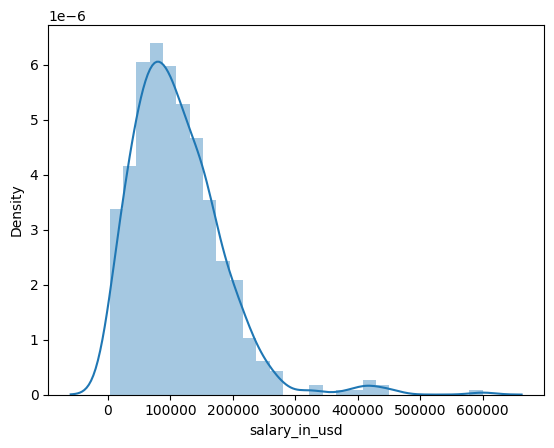

In [67]:
sns.distplot(salary_final['salary_in_usd'])

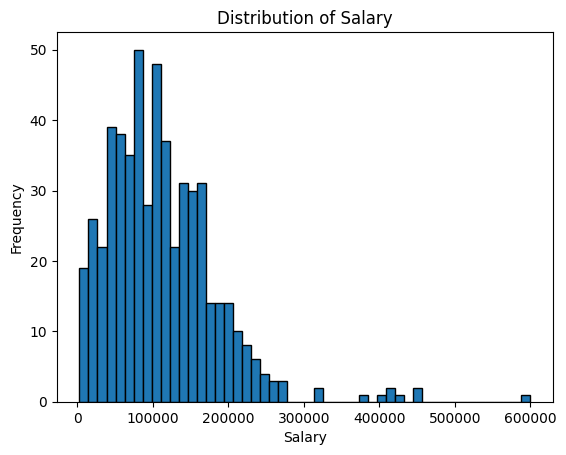

In [68]:
plt.hist(salary_final['salary_in_usd'], bins=50, edgecolor='black')
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

##### Are there any outliers in the salary distribution?

In [69]:
# Calculate the IQR (Interquartile Range)
Q1 = salary_final['salary_in_usd'].quantile(0.25)
Q3 = salary_final['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = salary_final[(salary_final['salary_in_usd'] < lower_bound) |
                          (salary_final['salary_in_usd'] > upper_bound)]
outliers.sort_values(by = 'salary_in_usd', ascending= True)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,remote_work_type,company_location,company_size,job_category,experience_level_type,company_size_type,salary_in_usd
438,2022,Executive-level / Director (Expert),Full-time,Data Engineer,324000.0,USD,United States,100,Fully remote,United States,M,Data Engineering,4,2,324000.0
24,2020,Executive-level / Director (Expert),Full-time,Director of Data Science,325000.0,USD,United States,100,Fully remote,United States,L,Leadership (DS),4,3,325000.0
475,2022,Senior-level (Intermediate),Full-time,Applied Data Scientist,380000.0,USD,United States,100,Fully remote,United States,L,Data Science,3,3,380000.0
479,2022,Senior-level (Intermediate),Full-time,Data Analytics Lead,405000.0,USD,United States,100,Fully remote,United States,L,Data Analyst,3,3,405000.0
59,2020,Senior-level (Intermediate),Full-time,Data Scientist,412000.0,USD,United States,100,Fully remote,United States,L,Data Science,3,3,412000.0
212,2021,Executive-level / Director (Expert),Contract,Principal Data Scientist,416000.0,USD,United States,100,Fully remote,United States,S,Data Science,4,1,416000.0
148,2021,Mid-level (Junior),Full-time,Applied Machine Learning Scientist,423000.0,USD,United States,50,Hybrid,United States,L,Machine Learning,2,3,423000.0
32,2020,Mid-level (Junior),Full-time,Research Scientist,450000.0,USD,United States,0,On-site only,United States,M,Research,2,2,450000.0
91,2021,Mid-level (Junior),Full-time,Financial Data Analyst,450000.0,USD,United States,100,Fully remote,United States,L,Data Analyst,2,3,450000.0
236,2021,Executive-level / Director (Expert),Full-time,Principal Data Engineer,600000.0,USD,United States,100,Fully remote,United States,L,Data Engineering,4,3,600000.0


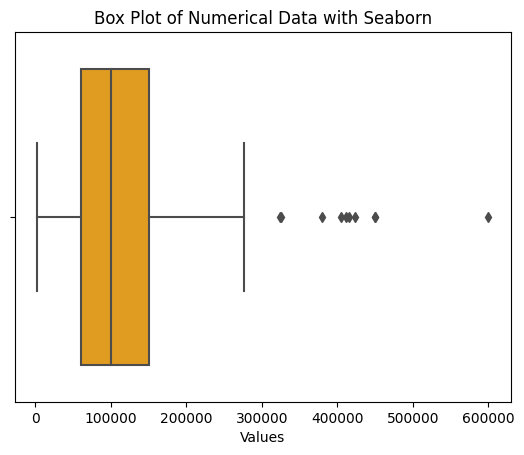

In [70]:
sns.boxplot(x=salary_final['salary_in_usd'], color='orange')
plt.title('Box Plot of Numerical Data with Seaborn')
plt.xlabel('Values')
plt.show()

The table contains salary outliers which are above 30,000

Average Salary by job category

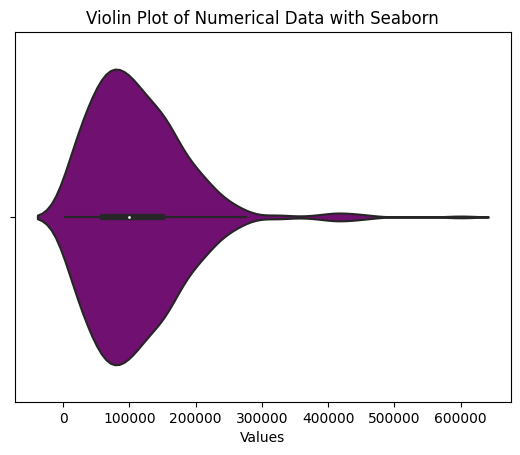

In [71]:
sns.violinplot(x=salary_final['salary_in_usd'], color='purple')
plt.title('Violin Plot of Numerical Data with Seaborn')
plt.xlabel('Values')
plt.show()

More number of salary data points are accumulated between 0 and 300000 USD

##### Average Salary by Job Category

In [72]:
average_salary_by_category = salary_final.groupby(['job_category'])['salary_in_usd'].mean()
average_salary_by_category = average_salary_by_category.reset_index()
average_salary_by_category.sort_values(by='salary_in_usd', ascending= False, inplace= True)
average_salary_by_category

,job_category,salary_in_usd
2,Data Architect,171357.835061
7,Leadership (DS),167827.680417
6,Leadership (DE),132821.188552
5,Leadership (DA),127134.285714
3,Data Engineering,112454.064969
10,Research,111003.396097
4,Data Science,110559.051114
9,Machine Learning,109350.925335
8,Leadership (ML),95938.172796
1,Data Analyst,95048.712598


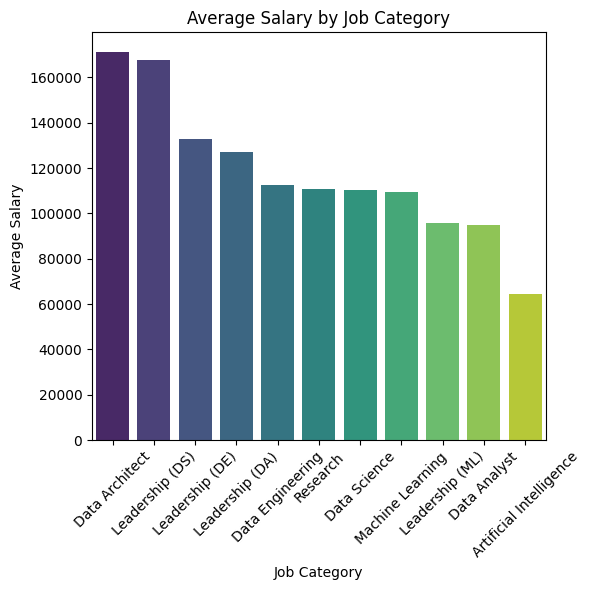

In [73]:
plt.figure(figsize=(6, 6))
sns.barplot(x=average_salary_by_category['job_category'], y=average_salary_by_category['salary_in_usd'],
            data=average_salary_by_category, palette='viridis')
plt.title('Average Salary by Job Category')
plt.xlabel('Job Category')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**More** earned job category is **Data Architect** and **least** earned is **Artificial Intelligence**.

##### What is the proportionate of each job category among all categories??

In [77]:
job_category_count = salary_final.groupby(['job_category'])['salary_in_usd'].count()
job_category_count = job_category_count.reset_index()
job_category_count.sort_values(by='salary_in_usd', ascending= False, inplace= True)
job_category_count

,job_category,salary_in_usd
4,Data Science,146
3,Data Engineering,144
1,Data Analyst,102
9,Machine Learning,64
7,Leadership (DS),27
0,Artificial Intelligence,16
10,Research,15
2,Data Architect,12
5,Leadership (DA),7
6,Leadership (DE),7


<ipython-input-90-2f81688efb79>:8: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(wedges, labels= job_category_count['job_category'], title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


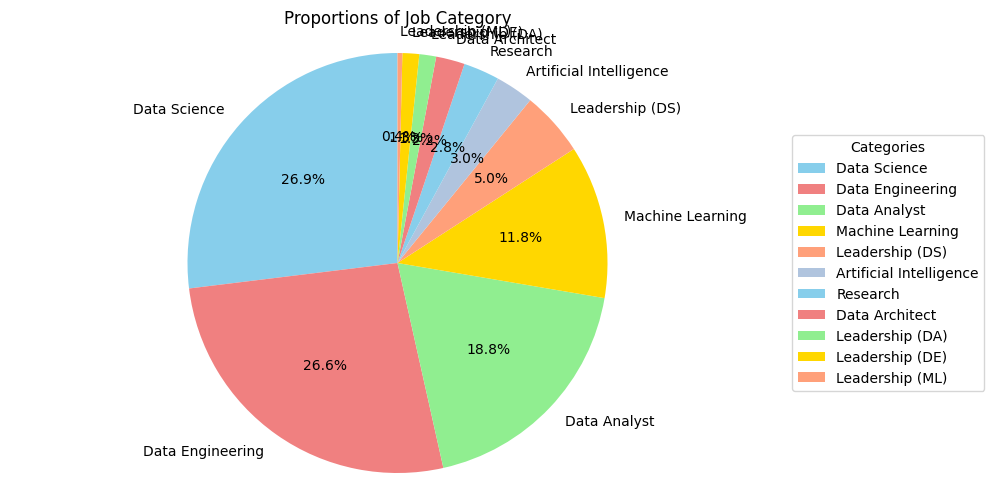

In [90]:
# Create a pie chart
plt.figure(figsize=(10, 6))
wedges, texts, autotexts = plt.pie(job_category_count['salary_in_usd'], labels=job_category_count['job_category'], autopct='%1.1f%%', startangle=90,
                                   colors=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'lightsalmon', 'lightsteelblue'])

# Customize the plot

plt.legend(wedges, labels= job_category_count['job_category'], title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Proportions of Job Category')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle

plt.show()

##### Average Salary by Job Role

In [ ]:
average_salary_by_role = salary_final.groupby(['job_title'])['salary_in_usd'].mean()
average_salary_by_role = average_salary_by_role.reset_index()
average_salary_by_role.sort_values(by='salary_in_usd', ascending= False, inplace= True)
average_salary_by_role

,job_title,salary_in_usd
14,Data Analytics Lead,405000.000000
45,Principal Data Engineer,328333.333333
28,Financial Data Analyst,275000.000000
46,Principal Data Scientist,213000.372300
3,Applied Data Scientist,206010.316369
25,Director of Data Science,193827.667206
16,Data Architect,177873.909091
2,Analytics Engineer,175000.000000
23,Data Specialist,165000.000000
9,Cloud Data Engineer,160000.000000


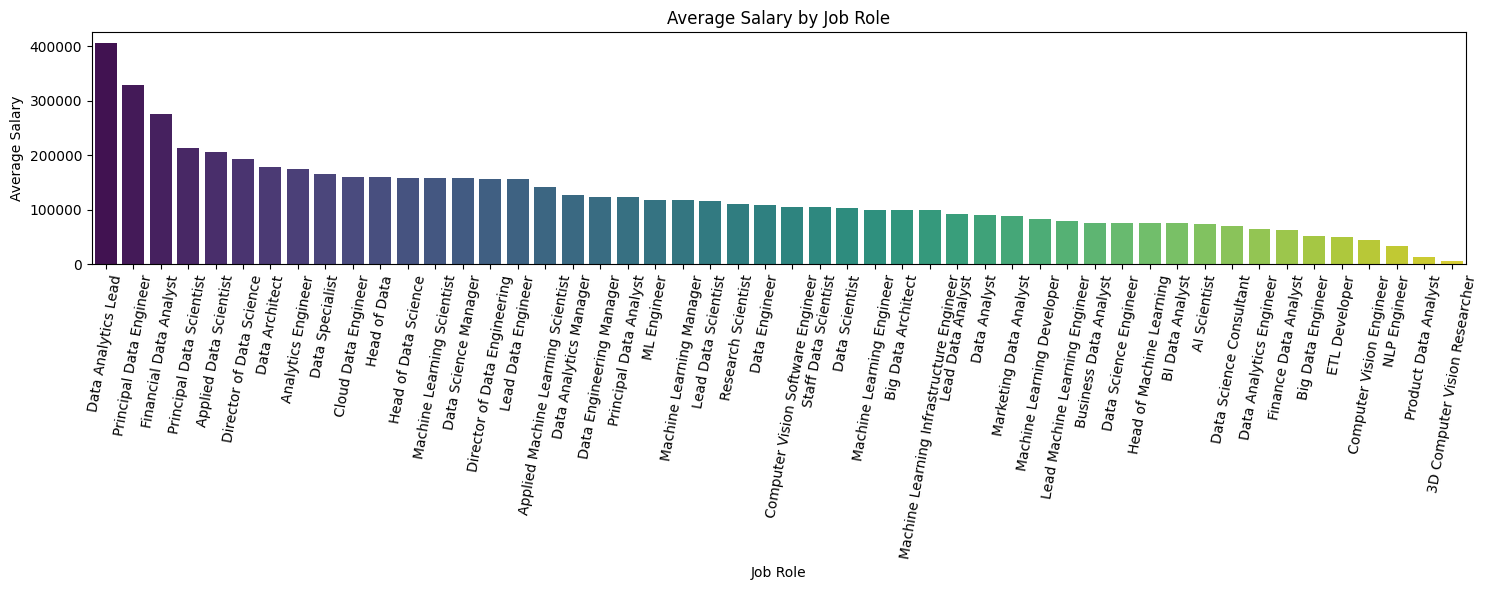

In [ ]:
plt.figure(figsize=(15, 6))
sns.barplot(x=average_salary_by_role['job_title'], y=average_salary_by_role['salary_in_usd'],
            data=average_salary_by_role, palette='viridis')
plt.title('Average Salary by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Average Salary')
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

**More** earned job role is **Data Analytics Lead** and **least** earned is **3D Computer Vision Researcher**.

##### Average Data Analyst Salary by Country

In [ ]:
data_analyst_country = salary_final[salary_final['job_category']=='Data Analyst'].groupby(['company_location'])['salary_in_usd'].mean()
data_analyst_country = data_analyst_country.reset_index()
data_analyst_country.sort_values(by = 'salary_in_usd', ascending=False, inplace=True)
data_analyst_country

,company_location,salary_in_usd
13,United States,117308.524921
1,Denmark,88757.396450
0,Canada,76073.697247
3,Germany,63905.325444
8,Luxembourg,59171.597633
2,France,52987.625301
12,United Kingdom,50993.271203
4,Greece,29784.999505
11,Spain,20045.217348
5,Honduras,20000.000000


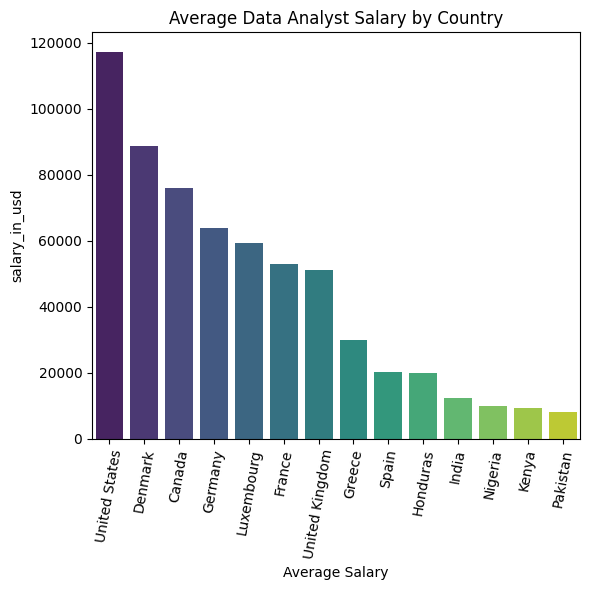

In [ ]:
plt.figure(figsize=(6, 6))
sns.barplot(x=data_analyst_country['company_location'], y = data_analyst_country['salary_in_usd'], data= data_analyst_country,
           palette='viridis')
plt.title('Average Data Analyst Salary by Country')
plt.xlabel('Country')
plt.xlabel('Average Salary')
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

The Highest Average salary is in the **United States** and Lowest Average Salary is in **Pakistan**.

##### Which job Category earns more Data Enginerring, Data Analyst or Data Science ?

In [ ]:
average_salary_by_category.head()

,job_category,salary_in_usd
2,Data Architect,171357.835061
7,Leadership (DS),167827.680417
6,Leadership (DE),132821.188552
5,Leadership (DA),127134.285714
3,Data Engineering,112454.064969


In [ ]:
average_salary_by_category[(average_salary_by_category['job_category']=='Data Engineering') |
                           (average_salary_by_category['job_category']=='Data Analyst') |
                            (average_salary_by_category['job_category']=='Data Science') ]


,job_category,salary_in_usd
3,Data Engineering,112454.064969
4,Data Science,110559.051114
1,Data Analyst,95048.712598


Among the three job categories Data Enigneering more and Data Analyst pays less

##### How does the average salary vary based on different experience levels?

In [ ]:
average_salary_experience = salary_final.groupby(['experience_level'])['salary_in_usd'].mean()
average_salary_experience = average_salary_experience.reset_index()
average_salary_experience.sort_values(by = 'salary_in_usd', ascending = False, inplace = True)
average_salary_experience

,experience_level,salary_in_usd
1,Executive-level / Director (Expert),198686.702661
3,Senior-level (Intermediate),137965.259291
2,Mid-level (Junior),87963.937603
0,Entry-level,62009.141187


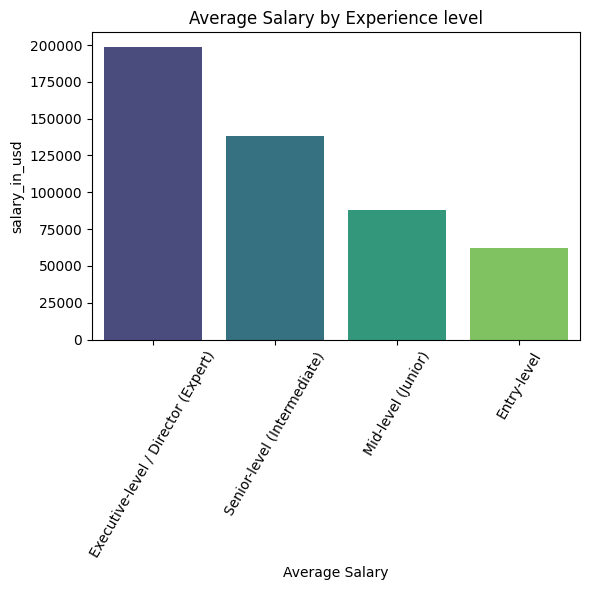

In [ ]:
plt.figure(figsize=(6, 6))
sns.barplot(x=average_salary_experience['experience_level'], y = average_salary_experience['salary_in_usd'],
            data= average_salary_experience, palette='viridis')
plt.title('Average Salary by Experience level')
plt.xlabel('Experience Level')
plt.xlabel('Average Salary')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

##### Is there a correlation between the number of years of experience and salary?

In [ ]:
salary_experience = salary_final[['experience_level_type', 'salary_in_usd']]
salary_experience_corr = salary_experience.corr()
salary_experience_corr

,experience_level_type,salary_in_usd
experience_level_type,1.000000,0.474629
salary_in_usd,0.474629,1.000000


Text(0.5, 1.0, 'Correlation Analysis between Experience level and Salary')

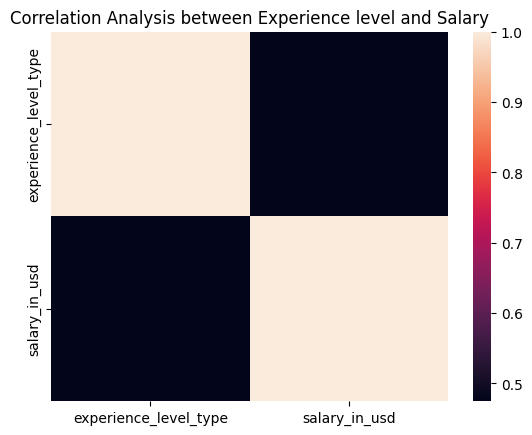

In [ ]:
sns.heatmap(salary_experience_corr, xticklabels = salary_experience.columns,
            yticklabels = salary_experience.columns)
plt.title('Correlation Analysis between Experience level and Salary')

As we can see from the plot the correlation is around 0.5 which is greater that 0 and experience level have significance affect on the salary

##### What is the distribution of employment types in the dataset?

In [ ]:
salary_final.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,remote_work_type,company_location,company_size,job_category,experience_level_type,company_size_type,salary_in_usd
0,2020,Mid-level (Junior),Full-time,Data Scientist,70000.0,EUR,Germany,0,On-site only,Germany,L,Data Science,2,3,79908.675799
1,2020,Senior-level (Intermediate),Full-time,Machine Learning Scientist,260000.0,USD,Japan,0,On-site only,Japan,S,Machine Learning,3,1,260000.000000
2,2020,Senior-level (Intermediate),Full-time,Big Data Engineer,85000.0,GBP,GB,50,Hybrid,United Kingdom,M,Data Engineering,3,2,108974.358974
3,2020,Mid-level (Junior),Full-time,Product Data Analyst,20000.0,USD,Honduras,0,On-site only,Honduras,S,Data Analyst,2,1,20000.000000
4,2020,Senior-level (Intermediate),Full-time,Machine Learning Engineer,150000.0,USD,United States,50,Hybrid,United States,L,Machine Learning,3,3,150000.000000


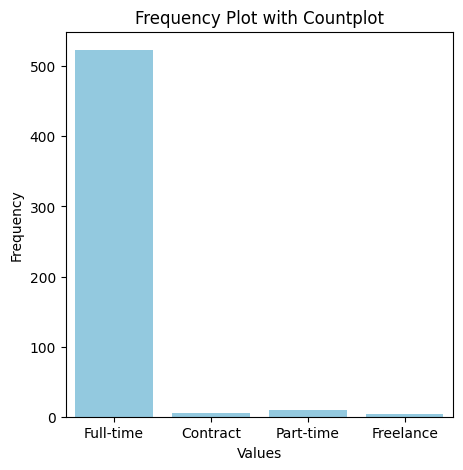

In [ ]:


plt.figure(figsize=(5, 5))
sns.countplot(x=salary_final['employment_type'], color='skyblue')

# Customize the plot
plt.title('Frequency Plot with Countplot')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

More than 90% of the dataset contains fulltime employment data.

##### Find out average salaries across the employment types

In [ ]:
avg_salary_by_employment_type = salary_final.groupby(['employment_type'])['salary_in_usd'].mean()
avg_salary_by_employment_type = avg_salary_by_employment_type.reset_index()
avg_salary_by_employment_type.sort_values(by = 'salary_in_usd', ascending = False, inplace = True)
avg_salary_by_employment_type

,employment_type,salary_in_usd
0,Contract,183946.557020
2,Full-time,112596.911082
1,Freelance,48000.000000
3,Part-time,32544.177586


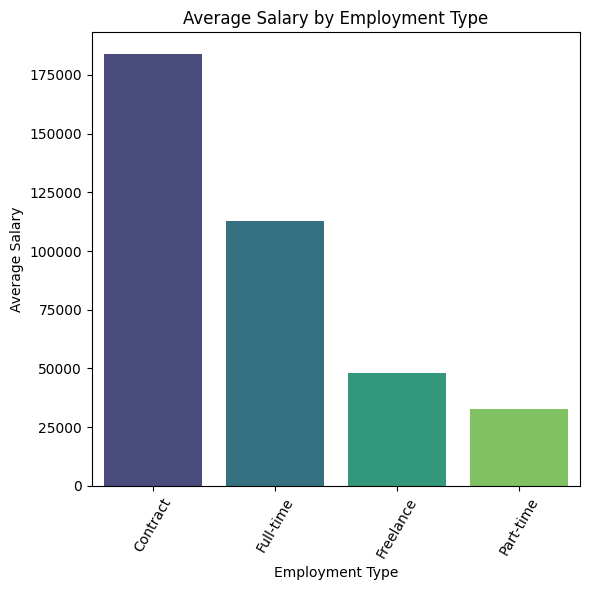

In [ ]:
plt.figure(figsize=(6, 6))
sns.barplot(x=avg_salary_by_employment_type['employment_type'], y = avg_salary_by_employment_type['salary_in_usd'],
            data= avg_salary_by_employment_type, palette='viridis')
plt.title('Average Salary by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Average Salary')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

##### Which company size pays data professionals the most on average? Is there a relationship between company size and average pay?

In [ ]:
avg_salary_by_company_size = salary_final.groupby(['company_size'])['salary_in_usd'].mean()
avg_salary_by_company_size = avg_salary_by_company_size.reset_index()
avg_salary_by_company_size.sort_values(by = 'salary_in_usd', ascending = False, inplace = True)
avg_salary_by_company_size

,company_size,salary_in_usd
0,L,118863.796135
1,M,115076.060593
2,S,78886.789598


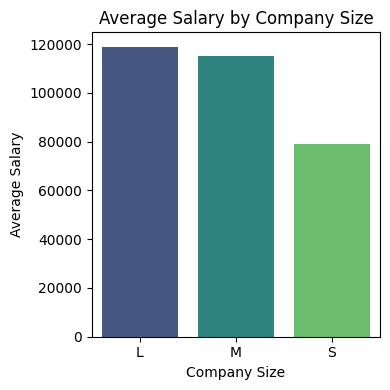

In [ ]:
plt.figure(figsize=(4, 4))
sns.barplot(x=avg_salary_by_company_size['company_size'], y = avg_salary_by_company_size['salary_in_usd'],
            data= avg_salary_by_company_size, palette='viridis')
plt.title('Average Salary by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Average Salary')

plt.tight_layout()
plt.show()

In [ ]:
salary_by_company_size = salary_final[['company_size_type', 'salary_in_usd']]
salary_by_company_size_corr = salary_by_company_size.corr()
salary_by_company_size_corr

,company_size_type,salary_in_usd
company_size_type,1.000000,0.146986
salary_in_usd,0.146986,1.000000


As you can see there is a slight positive signifacnce of company on the salaries

##### Which job category pays the most on average in 2022?

In [ ]:
salary_2022 = salary_final[salary_final['work_year']==2022]
salary_2022

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,remote_work_type,company_location,company_size,job_category,experience_level_type,company_size_type,salary_in_usd
270,2022,Senior-level (Intermediate),Full-time,Data Engineer,135000.0,USD,United States,100,Fully remote,United States,M,Data Engineering,3,2,135000.0
271,2022,Senior-level (Intermediate),Full-time,Data Analyst,155000.0,USD,United States,100,Fully remote,United States,M,Data Analyst,3,2,155000.0
272,2022,Senior-level (Intermediate),Full-time,Data Analyst,120600.0,USD,United States,100,Fully remote,United States,M,Data Analyst,3,2,120600.0
273,2022,Mid-level (Junior),Full-time,Data Scientist,130000.0,USD,United States,0,On-site only,United States,M,Data Science,2,2,130000.0
274,2022,Mid-level (Junior),Full-time,Data Scientist,90000.0,USD,United States,0,On-site only,United States,M,Data Science,2,2,90000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,2022,Senior-level (Intermediate),Full-time,Data Engineer,154000.0,USD,United States,100,Fully remote,United States,M,Data Engineering,3,2,154000.0
538,2022,Senior-level (Intermediate),Full-time,Data Engineer,126000.0,USD,United States,100,Fully remote,United States,M,Data Engineering,3,2,126000.0
539,2022,Senior-level (Intermediate),Full-time,Data Analyst,129000.0,USD,United States,0,On-site only,United States,M,Data Analyst,3,2,129000.0
540,2022,Senior-level (Intermediate),Full-time,Data Analyst,150000.0,USD,United States,100,Fully remote,United States,M,Data Analyst,3,2,150000.0


In [ ]:
salary_2022_avg_category = salary_2022.groupby(['job_category'])['salary_in_usd'].mean()
salary_2022_avg_category = salary_2022_avg_category.reset_index()
salary_2022_avg_category.sort_values(by='salary_in_usd', ascending = False, inplace = True)
salary_2022_avg_category

,job_category,salary_in_usd
2,Data Architect,182076.625000
6,Leadership (DS),166033.973827
4,Data Science,133292.763687
5,Leadership (DA),127485.000000
3,Data Engineering,122204.901769
0,Artificial Intelligence,121000.000000
8,Machine Learning,102855.715377
1,Data Analyst,102428.500994
9,Research,101668.284950
7,Leadership (ML),74799.537240


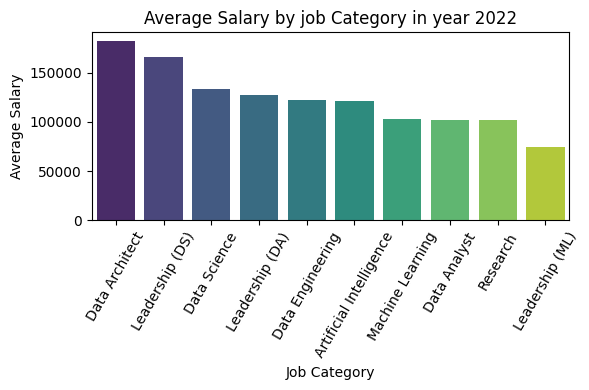

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x=salary_2022_avg_category['job_category'], y=salary_2022_avg_category['salary_in_usd'], data=salary_2022_avg_category,
            palette = 'viridis')
plt.title('Average Salary by job Category in year 2022')
plt.xlabel('Job Category')
plt.ylabel('Average Salary')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

In 2022, **Data Architect** pays the most on average.

In [ ]:
salary_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 542 entries, 0 to 541
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   work_year              542 non-null    int64  
 1   experience_level       542 non-null    object 
 2   employment_type        542 non-null    object 
 3   job_title              542 non-null    object 
 4   salary                 542 non-null    float64
 5   salary_currency        542 non-null    object 
 6   employee_residence     542 non-null    object 
 7   remote_ratio           542 non-null    int64  
 8   remote_work_type       542 non-null    object 
 9   company_location       542 non-null    object 
 10  company_size           542 non-null    object 
 11  job_category           542 non-null    object 
 12  experience_level_type  542 non-null    int64  
 13  company_size_type      542 non-null    int64  
 14  salary_in_usd          542 non-null    float64
dtypes: flo

In [ ]:
salary_final.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,remote_work_type,company_location,company_size,job_category,experience_level_type,company_size_type,salary_in_usd
0,2020,Mid-level (Junior),Full-time,Data Scientist,70000.0,EUR,Germany,0,On-site only,Germany,L,Data Science,2,3,79908.675799
1,2020,Senior-level (Intermediate),Full-time,Machine Learning Scientist,260000.0,USD,Japan,0,On-site only,Japan,S,Machine Learning,3,1,260000.000000
2,2020,Senior-level (Intermediate),Full-time,Big Data Engineer,85000.0,GBP,GB,50,Hybrid,United Kingdom,M,Data Engineering,3,2,108974.358974
3,2020,Mid-level (Junior),Full-time,Product Data Analyst,20000.0,USD,Honduras,0,On-site only,Honduras,S,Data Analyst,2,1,20000.000000
4,2020,Senior-level (Intermediate),Full-time,Machine Learning Engineer,150000.0,USD,United States,50,Hybrid,United States,L,Machine Learning,3,3,150000.000000


##### How salary varies across the remote_work_type? Is there any correlation between remote work and salary?

In [ ]:
avg_salary_remote = salary_final.groupby(['remote_work_type'])['salary_in_usd'].mean()
avg_salary_remote = avg_salary_remote.reset_index()
avg_salary_remote.sort_values(by='salary_in_usd', ascending = False, inplace= True)
avg_salary_remote

,remote_work_type,salary_in_usd
0,Fully remote,121170.079931
2,On-site only,104562.722663
1,Hybrid,79637.091116


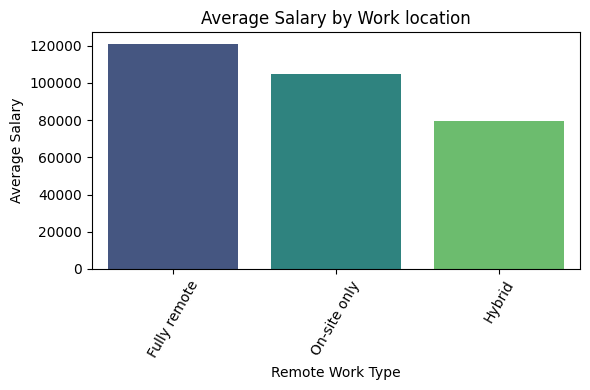

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x=avg_salary_remote['remote_work_type'], y=avg_salary_remote['salary_in_usd'], data=avg_salary_remote,
            palette = 'viridis')
plt.title('Average Salary by Work location')
plt.xlabel('Remote Work Type')
plt.ylabel('Average Salary')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

The highest earning employees are working remotely and least earned are working hybridly.

Which country has highest number of companies and from which country has highest number of employees ?

In [ ]:
company_residence = salary_final.groupby(['company_location'])['work_year'].count()
company_residence = company_residence.reset_index()
company_residence.sort_values(by='work_year', ascending=False, inplace=True)
company_residence

,company_location,work_year
43,United States,308
42,United Kingdom,44
5,Canada,26
13,Germany,26
17,India,24
12,France,15
38,Spain,13
14,Greece,9
23,Japan,6
35,Portugal,4


In [ ]:
employee_residence = salary_final.groupby(['employee_residence'])['work_year'].count()
employee_residence = employee_residence.reset_index()
employee_residence.sort_values(by='work_year', ascending=False, inplace=True)
employee_residence

,employee_residence,work_year
52,United States,288
16,GB,40
22,India,28
8,Canada,26
17,Germany,23
15,France,18
47,Spain,13
18,Greece,11
27,Japan,7
6,Brazil,6


# Conclusion

From the available data on salaries, we are trying to see how the average salary is changing across different job categories, job roles, countries, and other various factors like remote work, and experience level.

Some of the interesting findings are below:


1. The dataset contains the highest density of salary data between 0 and 300K USD.
2. The highest-paid job category is Data Architect and the lowest is Artificial Intelligence.
3. The highest-paid job role is Data Analytics Lead and the lowest is 3D Computer Vision Researcher.
4. The highest average salary by company location is United States and the lowest is in Pakistan.
5. Among all the roles in Data Field the three most important roles are Data Engineering, Data Analytics, and Data Science.The highest average salary among these roles is for Data Engineering and least is for Data Analyst.
6. The experience level matters for the salary earned by an employee. Through correlation analysis, it is found that there is a certain amount of significance of experience on the salary earned.
7. The highest salary is earned by contractors rather than Full-time employees.
8. In the year 2022, the Average Salary of Data Science is increased compared to the Data Engineering role.
9. A number of companies are from the United States and less number of companies are from Vietnam.
10. More employees are from the United States and less number of employees are working from Algeria.
